In [1]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from skimage import io, transform
from skimage.feature import hog
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def load_images_from_folder(folder, image_size=(224, 224), pixels_per_cell=(16, 16), cells_per_block=(1, 1), orientations=9):
    images = []
    labels = []
    class_folders = [os.path.join(folder, class_folder) for class_folder in os.listdir(folder) if os.path.isdir(os.path.join(folder, class_folder))]

    for class_folder in class_folders:
        label = os.path.basename(class_folder)  # Get the class label from folder name
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            if os.path.isfile(img_path):
                img = io.imread(img_path, as_gray=True)  # Load image in grayscale
                img = transform.resize(img, image_size)  # Resize image
                hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, block_norm='L2')

                images.append(hog_features)
                labels.append(label)

    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    return np.array(images), labels_encoded, label_encoder.classes_

In [3]:
train_folder = 'breast/train'
train_images, train_labels_encoded, classes1 = load_images_from_folder(train_folder)

print(f"Number of training images: {len(train_images)}")
print(f"Number of classes: {len(classes1)}")
print("Classes:", classes1)

Number of training images: 5487
Number of classes: 2
Classes: ['benign' 'malignant']


In [4]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels_encoded, test_size=0.2, random_state=42, shuffle=True)

In [5]:
# model = tf.keras.models.load_model('hog.keras')
model = Sequential()
model.add(Flatten(input_shape=(train_images.shape[1],)))  # Adjusting input shape based on HOG output
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(classes1), activation='softmax'))  # Adjusted for number of classes
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\TIBA\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
history = model.fit(x_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 6.9147e-04
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 5.9230e-04
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 5.5733e-04
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 4.0494e-04
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9963 - loss: 0.0149
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9793 - loss: 0.0544
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9622 - loss: 0.1054
Epoch 9/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9954 - loss: 0.0181
Epoch 10/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9984 - loss: 0.0103
Epoch 11/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9963 - loss: 0.0127
Epoch 12/100
220/220 ━━━━

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 2.4738e-05
Epoch 67/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.1411e-05
Epoch 68/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.9343e-05
Epoch 69/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.5747e-05
Epoch 70/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.5165e-05
Epoch 71/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.3133e-05
Epoch 72/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.1978e-05
Epoch 73/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 9.1403e-06
Epoch 74/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.0052e-05
Epoch 75/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 8.1015e-06
Epoch 76/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 7.6492e-06
E

In [17]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy: 0.930783242258652


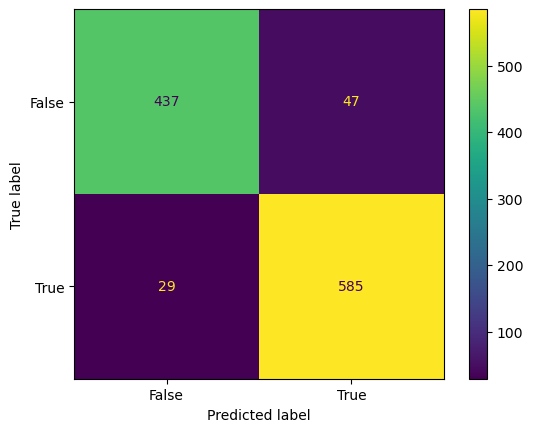

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [20]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

In [21]:
def load_and_preprocess_image(filepath, image_size=(224, 224), pixels_per_cell=(16, 16), cells_per_block=(1, 1), orientations=9):
    img = io.imread(filepath, as_gray=True)  # Load image in grayscale
    img = transform.resize(img, image_size)  # Resize image
    hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, block_norm='L2')
    return np.array([hog_features])  # Return in batch-like array format

In [22]:
def predict_image():
    global model
    filepath = filedialog.askopenfilename()  # Dialog to open file
    if filepath:
        features = load_and_preprocess_image(filepath)
        prediction = model.predict(features)
        pred_class = classes1[np.argmax(prediction)]
        label_predict.config(text=f"Predicted Class: {pred_class}")

        # Load and display image
        img = Image.open(filepath)
        img = img.resize((224, 224), Image.ANTIALIAS)  # Resize to fit the GUI window
        img = ImageTk.PhotoImage(img)
        panel_image.config(image=img)
        panel_image.image = img  # Keep a reference so it's not garbage collected
        button_load.pack(pady = 30)

In [25]:
# Setup the basic GUI
root = tk.Tk()
root.title("Image Classifier")
root.geometry("400x400")

# Frame for Image Display
frame_image = tk.Frame(root)
frame_image.pack(fill=tk.BOTH, expand=True)
panel_image = tk.Label(frame_image)
panel_image.pack(fill=tk.BOTH, expand=True)

# Prediction label
label_predict = tk.Label(root, text="Predicted Class: None", font=("Helvetica", 16))
label_predict.pack(fill=tk.BOTH, expand=True)

# Button to load and classify image
button_load = tk.Button(root, text="Load and Classify Image", command=predict_image)
button_load.pack(pady = 100)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\TIBA\AppData\Local\Temp\ipykernel_16064\1824112271.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224), Image.ANTIALIAS)  # Resize to fit the GUI window


In [19]:
# model.save('hog.keras')

In [14]:
# tf.keras.models.load_model('hog.keras')